# GA Data Science- Final Project

# NLP Analysis of Yelp Review Data

## By: Israel Niezen

## Loading Yelp Dataset & Necessary Libraries

In [1]:
# Unicode Handling
from __future__ import unicode_literals

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 8)
import seaborn as sns

data = pd.read_csv("yelp.csv")

### Describing Yelp Dataset

In [95]:

data.describe()

,stars,cool,useful,funny,text_length,great
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700,0.360100
std,1.214636,2.067861,2.336647,1.907942,617.399827,0.480053
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000,0.000000
75%,5.000000,1.000000,2.000000,1.000000,930.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000,1.000000


### Creating a text_length function & data column to check whether review length can serve as a predictor variable

In [97]:

data['text_length'] = data['text'].apply(len)

### Creating separate data columns returning a binary result TRUE if the Yelp review is POSITIVE or NEGATIVE
#### Positive review is defined as having 4 or 5 stars. Negative review is defined as having 1 star.

In [4]:
data['is_positive'] = ((data['stars'] ==4) | (data['stars']==5))
data['is_negative'] = (data['stars'] ==1) 

### Reading new dataframe head to make sure all new columns are included

In [5]:

data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length,is_positive,is_negative
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,True,False
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,True,False
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,True,False
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,True,False
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,True,False


# Exploratory Data Analisys

#### Grouping Data By Star Rating To See If Summary Helps Us Gather Anything Useful

In [129]:
stars_grouping = data.groupby('stars').sum()
stars_grouping

,cool,useful,funny,text_length,is_positive,is_negative,references_cool,great,references_great
stars,,,,,,,,,
1,432,1202,791,619060,0.0,749.0,21.0,79,79
2,667,1449,812,780772,0.0,0.0,48.0,201,201
3,1152,1909,1015,1108166,0.0,0.0,82.0,444,444
4,3366,4922,2364,2513767,3526.0,0.0,217.0,1520,1520
5,3151,4611,2031,2085622,3337.0,0.0,147.0,1357,1357


### Plotting Amount of Reviews By Star Rating Suggests that Reviewers Tend To More Often Review Businesses They feel Positively About

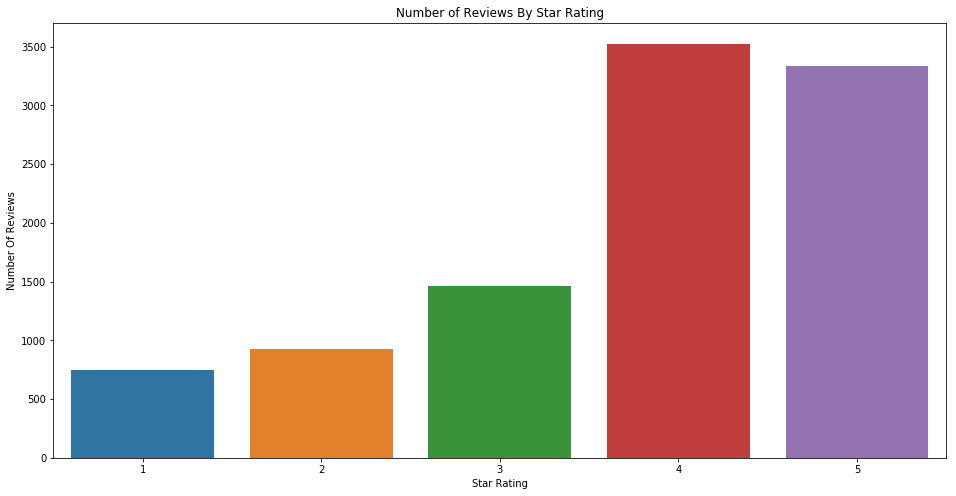

In [105]:
ax = sns.countplot(x= 'stars', data=data)
ax.set_ylabel('Number Of Reviews')
ax.set_xlabel('Star Rating')
ax.set_title('Number of Reviews By Star Rating')

### Plotting Average Text Length By Star Rating Suggests Reviewers Tend To Write Longer NEGATIVE Reviews Than POSITIVE Reviews
Used both barplot and boxplot (below) to explore min/max values and outliers

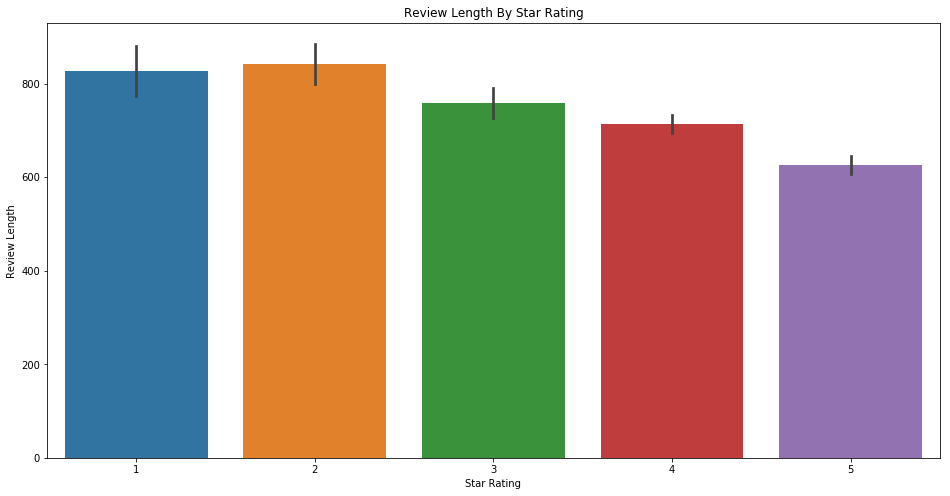

In [106]:
ax = sns.barplot(x= 'stars', y= 'text_length', data=data)
ax.set_ylabel('Review Length')
ax.set_xlabel('Star Rating')
ax.set_title('Review Length By Star Rating')

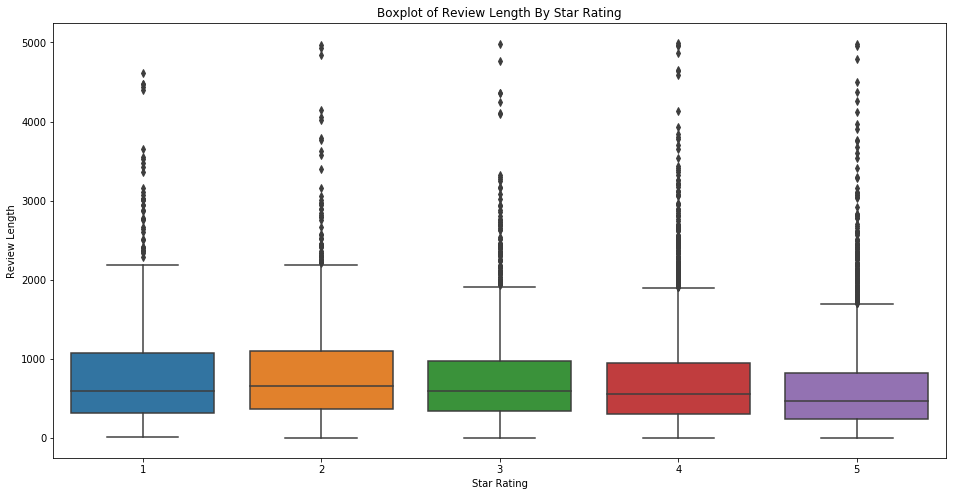

In [107]:
ax = sns.boxplot(x= 'stars', y= 'text_length', data=data)
ax.set_ylabel('Review Length')
ax.set_xlabel('Star Rating')
ax.set_title('Boxplot of Review Length By Star Rating')

### Plotting The Relationship Between Star Rating and "Cool" Votes for Reviews Suggests That Positive Reviews Receive More "Cool" Votes

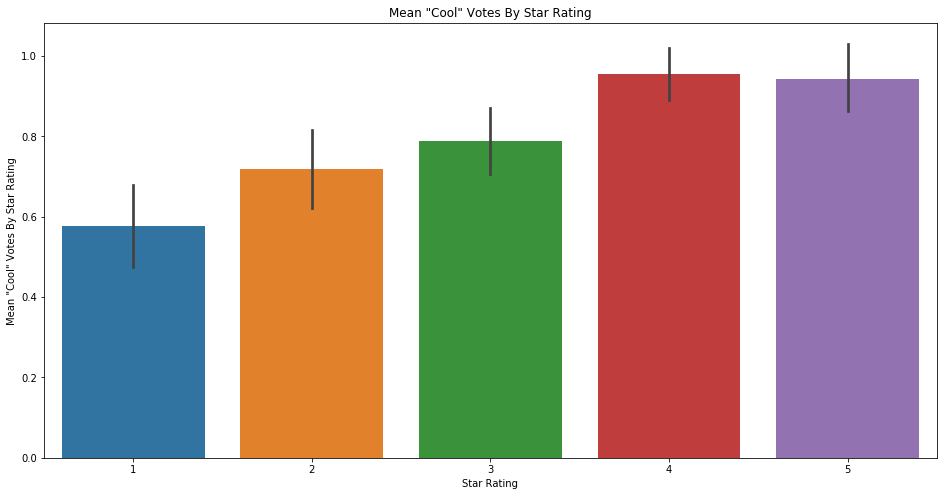

In [113]:
ax = sns.barplot(x= 'stars', y= 'cool', data=data)
ax.set_ylabel('Mean "Cool" Votes By Star Rating')
ax.set_xlabel('Star Rating')
ax.set_title('Mean "Cool" Votes By Star Rating')

### Plotting The Relationship Between Star Rating and "Useful" Votes for Reviews Suggests That Reviewers Find NEGATIVE Reviews More Useful Than Positive Reviews.  "Middle Of The Road" Reviews (3 star rating) Get The Lowest "Useful" Votes Overall.

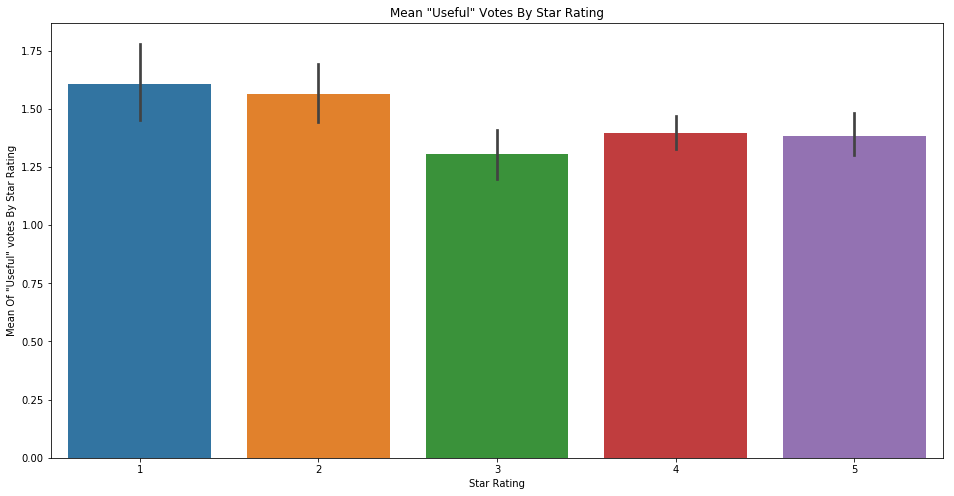

In [109]:

#stars_grouping_chart = stars_grouping.sort_values('stars', ascending=False).head(20)
ax = sns.barplot(x= 'stars', y= 'useful', data=data)
ax.set_ylabel('Mean Of "Useful" votes By Star Rating')
ax.set_xlabel('Star Rating')
ax.set_title('Mean "Useful" Votes By Star Rating')

### Plotting The Relationship Between Star Rating and "Funny" Votes for Reviews Suggests That Reviewers Find NEGATIVE Reviews Funnier Than Positive Reviews.  

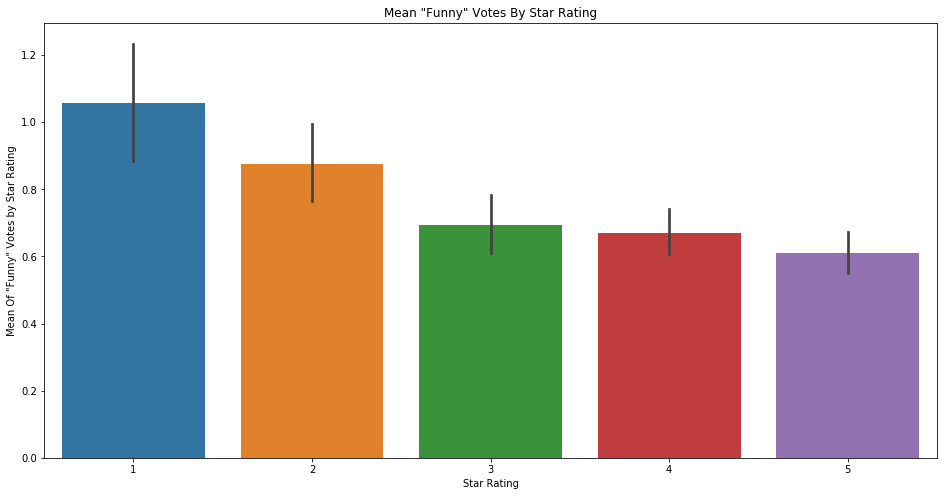

In [110]:
#stars_grouping_chart = stars_grouping.sort_values('stars', ascending=False).head(20)
ax = sns.barplot(x= 'stars', y= 'funny', data=data)
ax.set_ylabel('Mean Of "Funny" Votes by Star Rating')
ax.set_xlabel('Star Rating')
ax.set_title('Mean "Funny" Votes By Star Rating')

# Natural Language Processing Section

In [7]:
## Load spacy

from spacy.en import English
nlp_toolkit = English()
nlp_toolkit

## Investigate Review Text To See If Specific Words In Review Text Might Have A Measurable Impact On Review Ratings

 ### Extracting Text Content That Includes Word "Cool" and Creating a Function That Adds a Column For This.

In [8]:
def references_cool(text):
    parsed = nlp_toolkit(text)
    return any([str(word) == 'cool' for word in parsed])

data['references_cool'] = data['text'].map(references_cool)

# Taking a look to ensure function worked
data[data['references_cool']][['text']].head()

,text
24,I love this place! I have been coming here for...
38,"This Mexican food is very simple, slightly bla..."
41,I really really like Frances. I love most of ...
49,"After my last review, somewhat scathing regard..."
55,"In our continuing quest to identify cool, loca..."


#### This Line Of Code Pulls The Entire Review Values Containing The Word "COOL", but takes too long too process, so it's commented out

In [9]:
#data[data['references_cool']][['text']].head().values

 ### Extracting Text Content That Includes Word "Great" and Creating a Function That Adds a Column For This.
 #### Trying different syntax than above



In [121]:
# Option 1: Create a function to check for this

def has_great(text_in):
    try:
        if 'great' in str(text_in).lower():
            return 1
        else:
            return 0
    except: 
        return 0
        
data['references_great'] = data['text'].map(has_great)

#### Reviewing Dataframe to Make Sure My New Columns for Text Features Were Added

In [132]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length,is_positive,is_negative,references_cool,great,references_great
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,True,False,False,0,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,True,False,False,1,1
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,True,False,False,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,True,False,False,0,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,True,False,False,0,0


### Plotting Mean Frequency of Reviews Using the Word "COOL" Suggests A Small Difference Between Star Ratings

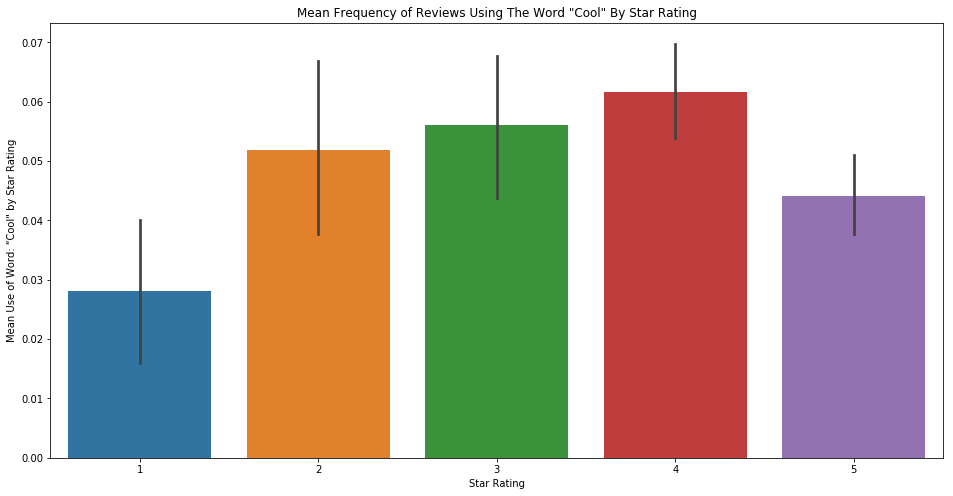

In [124]:
#stars_grouping_chart = stars_grouping.sort_values('stars', ascending=False).head(20)
ax = sns.barplot(x= 'stars', y= 'references_cool', data=data)
ax.set_ylabel('Mean Use of Word: "Cool" by Star Rating')
ax.set_xlabel('Star Rating')
ax.set_title('Mean Frequency of Reviews Using The Word "Cool" By Star Rating')

### Plotting Mean Frequency of Reviews Using the Word "GREAT" Suggests A Significant Correlation Between Use of The Word "Great" and Positive Yelp Reviews

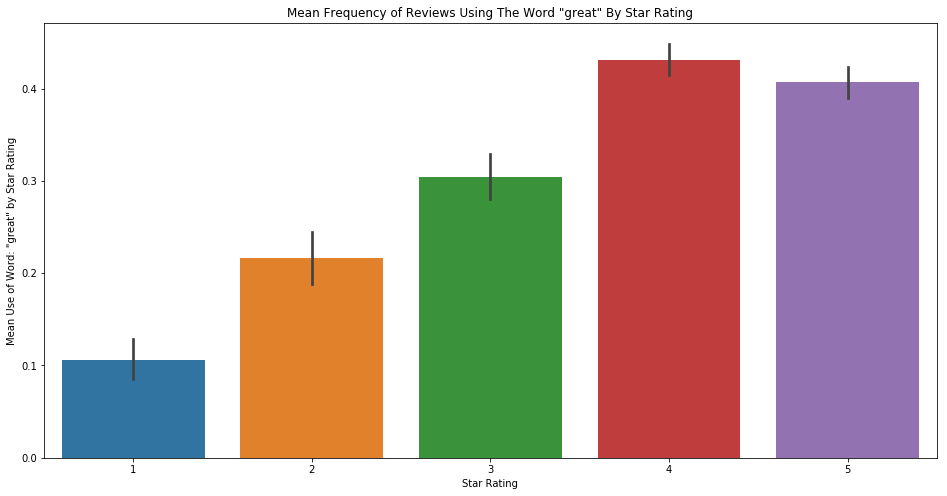

In [125]:
#stars_grouping_chart = stars_grouping.sort_values('stars', ascending=False).head(20)
ax = sns.barplot(x= 'stars', y= 'references_great', data=data)
ax.set_ylabel('Mean Use of Word: "great" by Star Rating')
ax.set_xlabel('Star Rating')
ax.set_title('Mean Frequency of Reviews Using The Word "great" By Star Rating')

## Exploratory Data Analysis Of Review Text Suggests That Review Ratings Might Be Correlated To Specific Words As Features
### So I Decided To Use NLP To Explore This Relationship Further Using NLP Algorithms

 ### Using Count Vectorizer To Extract 1000 Features from Text

In [12]:
text = data['text'].fillna('')

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english',
                             binary=True)

# Use `fit` to learn the vocabulary of the text
vectorizer.fit(text)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(text)

In [13]:
vectorizer.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '15',
 '20',
 '25',
 '30',
 '40',
 '50',
 '99',
 'able',
 'absolutely',
 'actually',
 'add',
 'added',
 'addition',
 'admit',
 'afternoon',
 'ago',
 'agree',
 'ahead',
 'amazing',
 'ambiance',
 'american',
 'apparently',
 'appetizer',
 'appetizers',
 'appreciate',
 'area',
 'aren',
 'arizona',
 'arrived',
 'art',
 'asian',
 'ask',
 'asked',
 'asking',
 'ass',
 'ate',
 'atmosphere',
 'attention',
 'attentive',
 'authentic',
 'available',
 'average',
 'avoid',
 'away',
 'awesome',
 'awful',
 'az',
 'baby',
 'bacon',
 'bad',
 'bag',
 'baked',
 'bar',
 'bars',
 'bartender',
 'bartenders',
 'based',
 'basically',
 'basil',
 'bathroom',
 'bbq',
 'bean',
 'beans',
 'beat',
 'beautiful',
 'beef',
 'beer',
 'beers',
 'believe',
 'best',
 'better',
 'big',
 'birthday',
 'bit',
 'bite',
 'black',
 'bland',
 'blue',
 'book',
 'bottle',
 'bought',
 'bowl',
 'box',
 'boyfriend',
 'bread',
 'break',
 'breakfast',
 'bring',
 'brought',
 'brown',
 'brunch',
 'bucks'

 ## Building A Random Forest Model to Predict If Yelp Review is POSITIVE Produces AUC Scores Suggesting That Reviews Can Successfully Be Classified as Positive Based On Text Features

### Creating And Scoring The Random Forest Classifier Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
# Use `fit` to learn the vocabulary of the text reviews

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = X.toarray()
y = data['is_positive']

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

/Users/israelniezen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CV AUC [ 0.79929681  0.80925232  0.81247304], Average AUC 0.8070073908811791


#### Fitting The Model and Creating Dataframe With Top 20 Features Based On Importance Score (measuring their impact on classifying Positive reviews)

In [15]:
model.fit(X, y)

all_feature_names = vectorizer.get_feature_names()
feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model.feature_importances_})
feature_importances.sort_values('Importance Score', ascending=False).head(20)

,Features,Importance Score
363,great,0.018185
585,ok,0.011388
54,bad,0.010464
23,amazing,0.010188
503,love,0.010172
208,delicious,0.009804
74,best,0.008463
531,mediocre,0.006936
412,horrible,0.006515
608,overpriced,0.006035


## Barchart to Explore Most Important Positive Review Features Using Random Forest Model

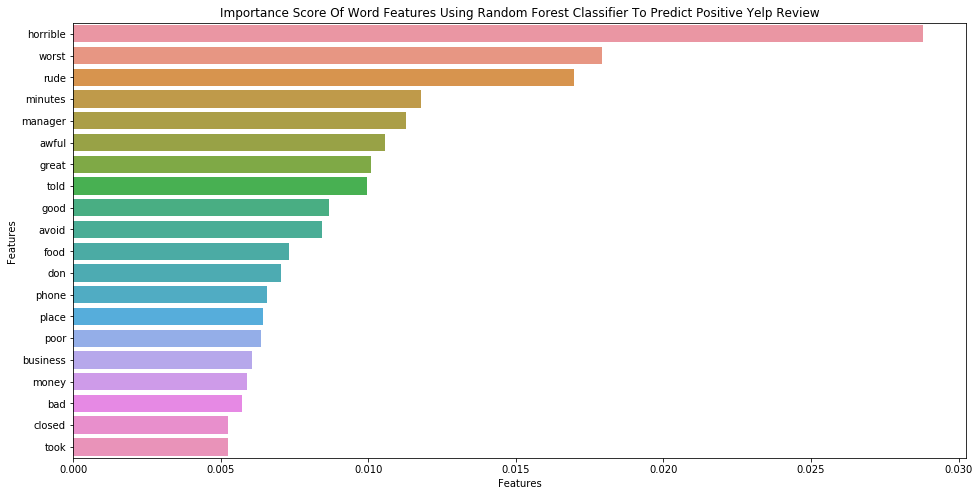

In [135]:
#posFeatures = sns.load_dataset("top_feature_importances")
top_feature_importances = feature_importances.sort_values('Importance Score', ascending=False).head(20)
ax = sns.barplot(y='Features', x='Importance Score', data=top_feature_importances)
ax.set_xlabel('Features')
ax.set_title('Importance Score Of Word Features Using Random Forest Classifier To Predict Positive Yelp Review')


 ## Using `Tf-IdfVectorizer` instead of `CountVectorizer`  shows a slight improvement
 
 ### Creating And Scoring The TF-IDF-Vectorizer Model

In [20]:
## 
text = data['text'].fillna('')

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english')


# Use `fit` to learn the vocabulary
vectorizer.fit(text)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(text).toarray()

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.81997833  0.8211627   0.82141373], Average AUC 0.8208515891332219


#### Fitting The Model and Creating Dataframe With Top 20 Features Based On Importance Score (measuring their impact on classifying Positive reviews)

In [21]:
model.fit(X, y)

all_feature_names = vectorizer.get_feature_names()
feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model.feature_importances_})
feature_importances.sort_values('Importance Score', ascending=False).head(20)

,Features,Importance Score
367,great,0.025280
587,ok,0.015427
218,delicious,0.013280
505,love,0.012504
77,best,0.010889
55,bad,0.010317
39,asked,0.008084
319,food,0.007634
414,horrible,0.007629
588,okay,0.007347


## Barchart to Explore Most Important Positive Review Features Using TF-IDF Vectorizer

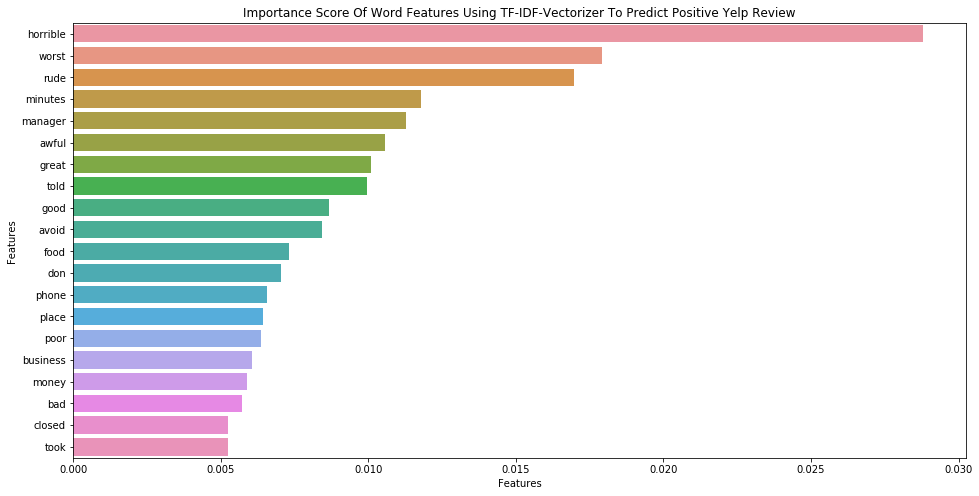

In [136]:
#posFeatures = sns.load_dataset("top_feature_importances")
top_feature_importances = feature_importances.sort_values('Importance Score', ascending=False).head(20)
ax = sns.barplot(y='Features', x='Importance Score', data=top_feature_importances)
ax.set_xlabel('Features')
ax.set_title('Importance Score Of Word Features Using TF-IDF-Vectorizer To Predict Positive Yelp Review')

## Apply LDA to text reviews to try and figure out what are the various clusters in the data to see if some reviews talk about food or service or food quality.  

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=False,
stop_words='english',
min_df=3)
docs = cv.fit_transform(text.dropna())
# Build a mapping of numerical ID to word
id2word = dict(enumerate(cv.get_feature_names()))

In [25]:
from gensim.models.ldamodel import LdaModel
from gensim.matutils import Sparse2Corpus
# First we convert our word-matrix into gensim's format
corpus = Sparse2Corpus(docs, documents_columns = False)
# Then we fit an LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=5)

In [26]:
num_topics = 5
num_words = 5
for ti, topic in enumerate(lda_model.show_topics(num_topics = num_topics, num_words = num_words)):
    print("Topic: %d" % (ti))
    print (topic)
    print()

Topic: 0
(0, '0.020*"place" + 0.013*"food" + 0.010*"great" + 0.010*"good" + 0.009*"just"')

Topic: 1
(1, '0.018*"good" + 0.013*"great" + 0.011*"place" + 0.010*"food" + 0.009*"just"')

Topic: 2
(2, '0.013*"food" + 0.011*"like" + 0.009*"good" + 0.007*"just" + 0.007*"service"')

Topic: 3
(3, '0.011*"good" + 0.010*"chicken" + 0.009*"food" + 0.008*"sushi" + 0.007*"really"')

Topic: 4
(4, '0.011*"place" + 0.008*"like" + 0.008*"time" + 0.006*"food" + 0.006*"just"')



### Building a random forest model to predict whether review is positive using text features AND text length

In [27]:

X2 = vectorizer.transform(text).toarray()

In [28]:
## TODO

X2_additional_cols = ['text_length']
X2_additional_data = data[X2_additional_cols]

from scipy.sparse import hstack
X2 = hstack((X2, X2_additional_data)).toarray()
y2 = data['is_positive']

from sklearn.cross_validation import cross_val_score

model_pos_len = RandomForestClassifier(n_estimators = 20)
scores_pos_len = cross_val_score(model_pos_len, X2, y2, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores_pos_len, scores_pos_len.mean()))


CV AUC [ 0.8199004   0.82264375  0.82831544], Average AUC 0.8236198637958108


In [29]:


# all_feature_names = vectorizer.get_feature_names()
# pos_len_feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model_pos_len.feature_importances_})
# print(pos_len_feature_importances)
# pos_len_feature_importances.sort_values('Importance Score', ascending=False).head(20)

model_pos_len.fit(X2, y2)

all_feature_names = vectorizer.get_feature_names()
#print(all_feature_names)
feature_importances = pd.DataFrame({'Features' : all_feature_names + ['review_length'], 'Importance Score': model_pos_len.feature_importances_})
feature_importances.sort_values('Importance Score', ascending=False).head(20)


,Features,Importance Score
367,great,0.023526
587,ok,0.015052
1000,review_length,0.013888
218,delicious,0.013515
505,love,0.011855
77,best,0.010012
961,wasn,0.008438
319,food,0.007892
55,bad,0.007870
24,amazing,0.007203


## Barchart to Explore Most Important Positive Review Features Using Random Forest AND Review Length

In [ ]:
## Barchart to Explore Most Important Positive Review Features Sorted By Importance

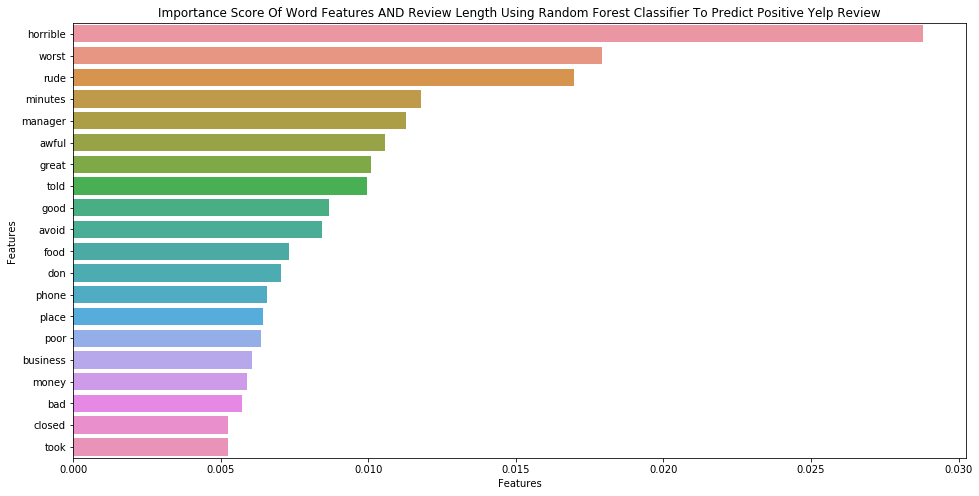

In [137]:
#posFeatures = sns.load_dataset("top_feature_importances")
top_feature_importances = feature_importances.sort_values('Importance Score', ascending=False).head(20)
ax = sns.barplot(y='Features', x='Importance Score', data=top_feature_importances)
ax.set_xlabel('Features')
ax.set_title('Importance Score Of Word Features AND Review Length Using Random Forest Classifier To Predict Positive Yelp Review')

 ### Building a random forest model to predict whether review is NEGATIVE using the review's "text" features

In [31]:
from sklearn.ensemble import RandomForestClassifier

model_neg = RandomForestClassifier(n_estimators = 20)
    
# Use `fit` to learn the vocabulary of the text reviews

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X3 = X
y3 = data['is_negative']

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model_neg, X3, y3, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.79657717  0.85029118  0.78793865], Average AUC 0.8116023344237174


In [32]:
model_neg.fit(X3, y3)

all_feature_names = vectorizer.get_feature_names()
feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model_neg.feature_importances_})
feature_importances.sort_values('Importance Score', ascending=False).head(20)


,Features,Importance Score
414,horrible,0.028808
985,worst,0.017911
727,rude,0.016981
548,minutes,0.011774
522,manager,0.011294
51,awful,0.010571
367,great,0.010080
892,told,0.009970
359,good,0.008663
48,avoid,0.008443


## Barchart to Explore Most Important Negative Review Features Using Random Forest

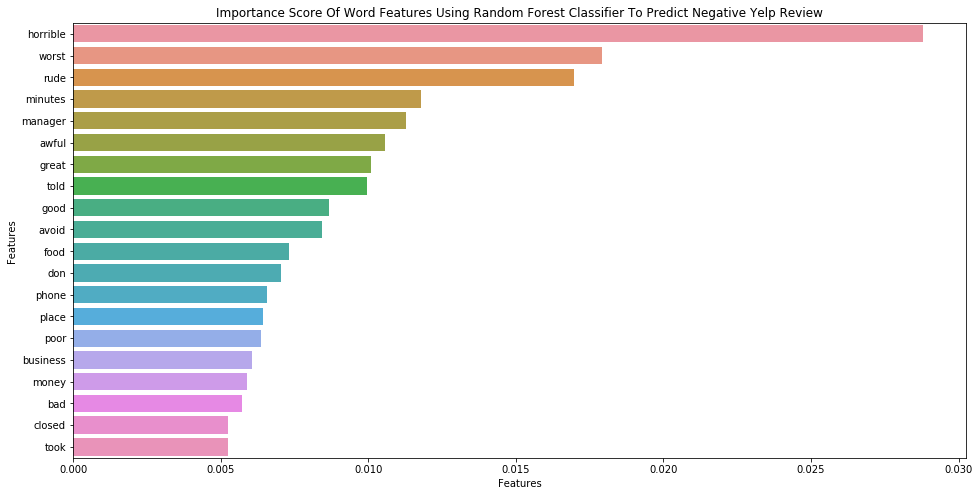

In [138]:
top_feature_importances = feature_importances.sort_values('Importance Score', ascending=False).head(20)
ax = sns.barplot(y='Features', x='Importance Score', data=top_feature_importances)
ax.set_xlabel('Features')
ax.set_title('Importance Score Of Word Features Using Random Forest Classifier To Predict Negative Yelp Review')

 ### Using `Tf-IdfVectorizer` instead of `CountVectorizer`  shows a slight improvement

In [139]:
## 
titles = data['text'].fillna('')

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english')


# Use `fit` to learn the vocabulary
vectorizer.fit(text)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(text).toarray()

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.81616615  0.81973097  0.81511183], Average AUC 0.8170029833576878


In [140]:
model_neg.fit(X3, y3)

all_feature_names = vectorizer.get_feature_names()
feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model_neg.feature_importances_})
feature_importances.sort_values('Importance Score', ascending=False).head(20)

,Features,Importance Score
414,horrible,0.019945
985,worst,0.017260
727,rude,0.012365
548,minutes,0.012336
367,great,0.011275
892,told,0.011061
522,manager,0.009903
554,money,0.009694
641,phone,0.008925
55,bad,0.008681


## Barchart to Explore Most Important Negative Review Features Using TF-IDF Vectorizer

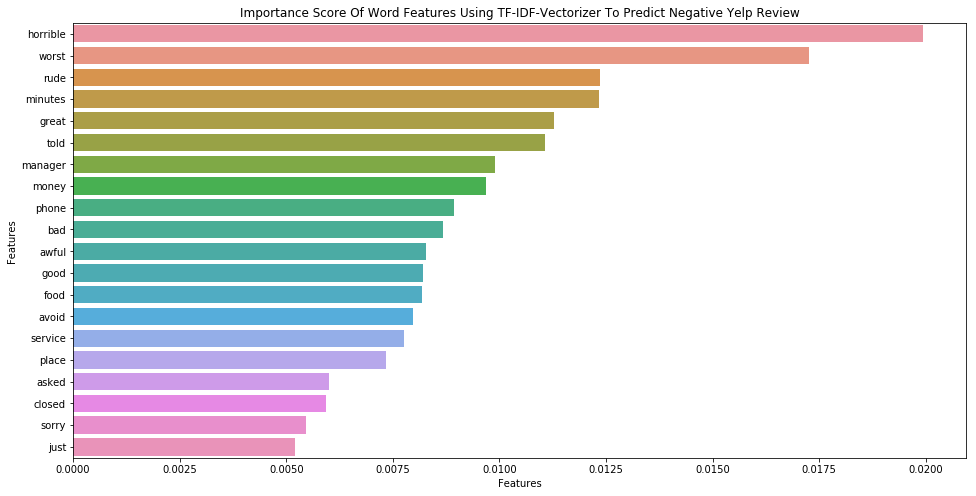

In [141]:
top_feature_importances = feature_importances.sort_values('Importance Score', ascending=False).head(20)
ax = sns.barplot(y='Features', x='Importance Score', data=top_feature_importances)
ax.set_xlabel('Features')
ax.set_title('Importance Score Of Word Features Using TF-IDF-Vectorizer To Predict Negative Yelp Review')